<a href="https://colab.research.google.com/github/matloob-altaf/Machine-Learning-LUMS/blob/main/Programming_Assignment_1/21100164.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist
import string
import re

In [3]:
df_train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML-PA1/train.csv")
df_test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML-PA1/test.csv")

df_train.head(10)

,Sentiment,Tweet
0,neutral,"@united 877 from amsterdam to ewr, 02.27.2015,..."
1,negative,@united IT-problems with the link? #3thparty
2,positive,@united -today the staff @ MSP took customer s...
3,negative,@AmericanAir but have been yet to receive assi...
4,negative,@SouthwestAir you won't let me change my rese...
5,neutral,@AmericanAir where do I look for cabin crew va...
6,neutral,@united please update what is going to happen ...
7,negative,@AmericanAir how do I redeem a travel voucher ...
8,neutral,@AmericanAir originating at SFO and going to LAX.
9,negative,@JetBlue Good perspective. If only this safety...


In [4]:
print("Train data dimentions", df_train.shape)
print("Test data dimentions", df_test.shape)


Train data dimentions (11680, 2)
Test data dimentions (2921, 2)


## Preprocessing
*removing the stop words, punctuation marks and other unwanted characters from the tweets and converting them to lower case*

In [5]:
# Loading stop words
stopWords = []
with open('/content/drive/My Drive/Colab Notebooks/ML-PA1/stop_words.txt', 'r') as fi:
    for line in fi:
        line = line.rstrip()
        stopWords.append(line)
stopWords += ["can't", 'cannot', 'could', "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i've", "let's", 'ought', "she'd", "she'll", "that's", "there's", "they'd", "they'll", "they're", "they've", "we'd", "we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", 'would', 'hey', 'hi']

print(stopWords)
print(len(stopWords))

['i', "i'm", 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 't

In [6]:

def removeUnwantedChars(tweet):
  # Removes the tweeter handle
  result = re.sub('(@)\w+', '', tweet)
  #  Converts to lower
  result = result.lower()
  # Removes stop words
  result = ' '.join(filter(lambda x: x not in stopWords,  result.split()))
  # Removes numbers
  result = re.sub(r'\d+', '', result)
  # Removes punctuactions
  result = re.sub(r'[^\w\s]','', result)
  # Removes leading and trailing white spaces
  result = result.strip()

  return result

In [7]:
df_train['preprocessedTweets'] = df_train['Tweet'].apply(removeUnwantedChars)
df_train.head()

,Sentiment,Tweet,preprocessedTweets
0,neutral,"@united 877 from amsterdam to ewr, 02.27.2015,...",amsterdam ewr
1,negative,@united IT-problems with the link? #3thparty,itproblems link thparty
2,positive,@united -today the staff @ MSP took customer s...,today staff msp took customer service new lev...
3,negative,@AmericanAir but have been yet to receive assi...,yet receive assistance one agents securing new...
4,negative,@SouthwestAir you won't let me change my rese...,let change reservation online wasting time htt...


In [8]:
df_test['preprocessedTweets'] = df_test['Tweet'].apply(removeUnwantedChars)
df_test.head()

,Sentiment,Tweet,preprocessedTweets
0,neutral,@VirginAmerica to jump into the Dallas-Austin ...,jump dallasaustin market httptcoewwgigdx
1,positive,"@AmericanAir Chicago seen from seat 6A, AA 162...",chicago seen seat a aa far great ride pdx htt...
2,negative,@united you need a bag bouncer. Get it together,need bag bouncer get together
3,negative,"@JetBlue Hey Jetblue, you stranded an entire p...",jetblue stranded entire plane supposed go jfk ...
4,negative,@USAirways Big fail on not having curbside bag...,big fail curbside baggage pittsburgh charge d...


## Feature Extraction
*representing each tweet as a bag-of-words (BoW), that is, an unordered set of words with their position ignored, keeping only their frequency in the tweet.*

In [9]:
def vectorize(tweet):
    vector=[]
    tokens = tweet.split()
    for w in vocabulary:
        vector.append(tokens.count(w))
    return np.asarray(vector)
def unique(tweet):
    tokens = tweet.split()
    for x in tokens:
      if not (x in vocabulary):
        vocabulary.append(x)

In [10]:
vocabulary = []
df_train['preprocessedTweets'].apply(unique)
print(vocabulary)

['amsterdam', 'ewr', 'itproblems', 'link', 'thparty', 'today', 'staff', 'msp', 'took', 'customer', 'service', 'new', 'level', 'father', 'passed', 'away', 'last', 'night', 'amp', 'helped', 'get', 'home', 'thanks', 'yet', 'receive', 'assistance', 'one', 'agents', 'securing', 'connection', 'many', 'miss', 'work', 'tomorrow', 'let', 'change', 'reservation', 'online', 'wasting', 'time', 'httptcomhaxxaed', 'look', 'cabin', 'crew', 'vacancies', 'please', 'update', 'going', 'happen', 'passengers', 'flt', 'ua', 'cancelled', 'flightled', 'redeem', 'travel', 'voucher', 'flight', 'reach', 'agent', 'phone', 'hold', 'expires', 'hours', 'originating', 'sfo', 'lax', 'good', 'perspective', 'safety', 'concern', 'expressed', 'point', 'arrived', 'airport', 'communicationiskey', 'welllllll', 'rt', 'fleets', 'fleek', 'httptcodhhomgkix', 'upgrades', 'paid', 'wifi', 'load', 'website', 'functionally', 'except', 'live', 'streaming', 'unacceptable', 'absolutely', 'worries', 'never', 'flying', 'again', 'ever', 'e

In [11]:
len(vocabulary)

12042

## Part 1 - KNN from Scrach

In [12]:
X_train = df_train['preprocessedTweets'].apply(vectorize)

In [13]:
X_test = df_test['preprocessedTweets'].apply(vectorize)

In [14]:
def trans(sentiment):
  if sentiment == "neutral":
    return 1
  elif sentiment == "positive":
    return 2
  else:
    return 3

In [15]:
X_train = np.stack(X_train)
X_test = np.stack(X_test)
Y_train = np.asarray(df_train['Sentiment'].apply(trans))
Y_test = np.array(df_test['Sentiment'].apply(trans))

In [16]:
X_test.shape

(2921, 12042)

In [17]:

def distances(train, test):
    dists = np.zeros((test.shape[0], train.shape[0])) 
    dists = np.sqrt(- 2*np.dot(test, train.T) + np.sum(np.square(train), axis = 1) + np.sum(np.square(test), axis = 1)[:, np.newaxis])
    # dists = cdist(test, train, 'euclidean')
    return dists

In [18]:
def predictLabels(y_train, dists, k=1):

    y_pred = np.zeros(dists.shape[0])
    for i in range(dists.shape[0]):
      # A list of length k storing the labels of the k nearest neighbors to
      # the ith test point.
      y_closest = []
    
      y_closest = y_train[np.argsort(dists[i])[:k]]
      y_pred[i] = np.argmax(np.bincount(y_closest))

    return y_pred

In [19]:
dists = distances(X_train, X_test)
print(dists)

[[2.23606798 2.44948974 4.89897949 ... 3.31662479 3.87298335 2.82842712]
 [3.31662479 3.46410162 5.47722558 ... 4.12310563 4.58257569 3.74165739]
 [2.44948974 2.64575131 4.79583152 ... 3.46410162 4.         3.        ]
 ...
 [2.23606798 2.44948974 4.89897949 ... 3.31662479 3.87298335 2.82842712]
 [4.24264069 4.35889894 6.08276253 ... 4.89897949 5.29150262 4.58257569]
 [3.46410162 3.60555128 5.56776436 ... 4.24264069 4.69041576 3.87298335]]


In [20]:
# calculate a confusion matrix
def confusion_matrix(actual, predicted):
	unique = set(actual)
	matrix = [list() for x in range(len(unique))]
	for i in range(len(unique)):
		matrix[i] = [0 for x in range(len(unique))]
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for i in range(len(actual)):
		x = lookup[actual[i]]
		y = lookup[predicted[i]]
		matrix[y][x] += 1
	return unique, matrix
 
def precision(matrix, y_test):
  precision = []
  recall = []
  f1Score = []
  for i in range(len(matrix)):
    totalPositive = matrix[i][0] + matrix[i][1] + matrix[i][2]
    actualPositive = np.count_nonzero(y_test == (i+1))
    for j in range(len(matrix[0])):
      if i == j:
        precision.append(matrix[i][j]/totalPositive)
        recall.append(matrix[i][j]/actualPositive)
    # f1 Score
    f1Score.append(2* (precision[i]*recall[i])/(precision[i]+recall[i]))

  
  return precision, recall, f1Score


In [21]:
K = [1,3,5,7,10]
accuracies = []
precisions = []
recalls = []
f1scores = []
for k in K:
  Y_pred = predictLabels(Y_train, dists, k)
# Compute and print the fraction of correctly predicted examples
  accuracy = (float(np.sum(Y_pred == Y_test)) / Y_test.shape[0])*100
  unique, matrix = confusion_matrix(Y_test, Y_pred)
  prec, rec, f1Sco = precision(matrix, Y_test)
  accuracies.append(accuracy)
  precisions.append(prec)
  recalls.append(rec)
  f1scores.append(f1Sco)
  print("K = ", k)
  print('Accuracy: %f %%' % (accuracy))
  print("Confusion Matrix", matrix)
  print("\n                 Neutral              Positive             Negative")
  print("Precision: ", prec)
  print("Recall:    ", rec)
  print("F1Score:   ", f1Sco)
  print("_____________________________________________________________________________________________\n")

K =  1
Accuracy: 54.159534 %
Confusion Matrix [[397, 141, 763], [84, 273, 159], [134, 58, 912]]

                 Neutral              Positive             Negative
Precision:  [0.3051498847040738, 0.5290697674418605, 0.8260869565217391]
Recall:     [0.6455284552845528, 0.5783898305084746, 0.49727371864776443]
F1Score:    [0.4144050104384134, 0.5526315789473686, 0.6208304969366916]
_____________________________________________________________________________________________

K =  3
Accuracy: 50.667580 %
Confusion Matrix [[474, 183, 956], [64, 255, 127], [77, 34, 751]]

                 Neutral              Positive             Negative
Precision:  [0.2938623682579045, 0.5717488789237668, 0.87122969837587]
Recall:     [0.7707317073170732, 0.5402542372881356, 0.4094874591057797]
F1Score:    [0.4254937163375225, 0.5555555555555556, 0.5571216617210683]
_____________________________________________________________________________________________

K =  5
Accuracy: 48.545019 %
Confusion Matri

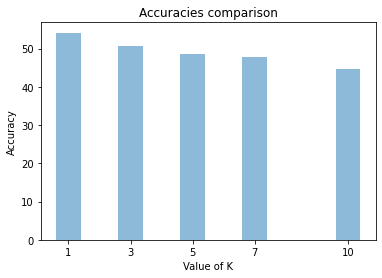

In [22]:
plt.bar(K, accuracies, align='center', alpha=0.5)
plt.xticks(K)
plt.ylabel('Accuracy')
plt.xlabel('Value of K')
plt.title('Accuracies comparison')

plt.show()

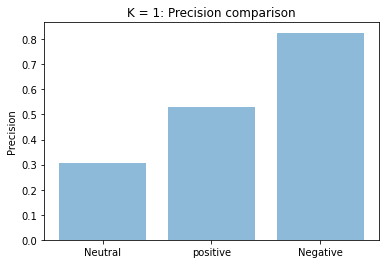

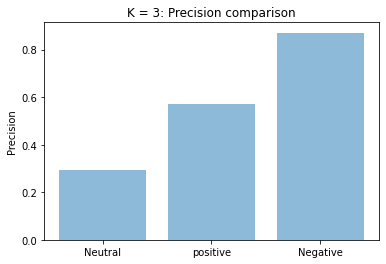

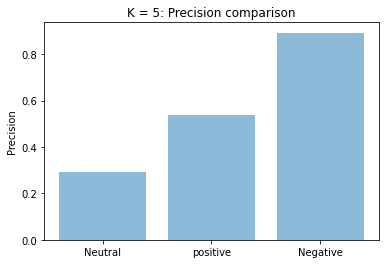

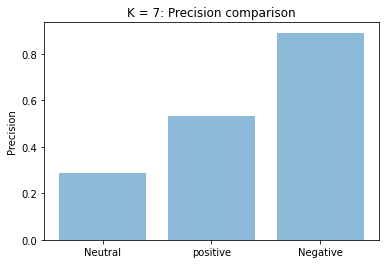

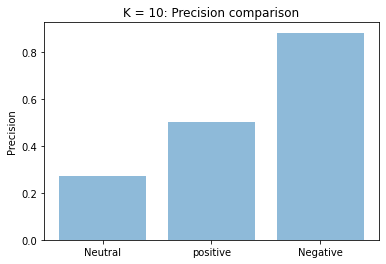

In [23]:
labels = ('Neutral', 'positive', 'Negative')
y_pos = np.arange(len(labels))
for i in range(len(K)):
  plt.bar(y_pos, precisions[i], align='center', alpha=0.5)
  plt.xticks(y_pos, labels)
  plt.ylabel('Precision')
  plt.title('K = %d: Precision comparison' % K[i])

  plt.show()

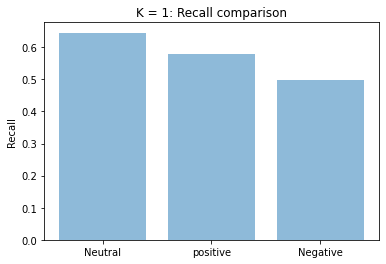

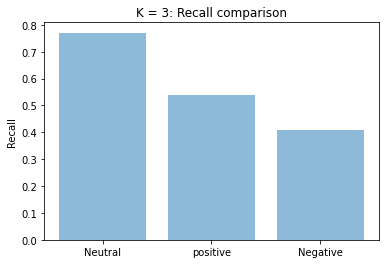

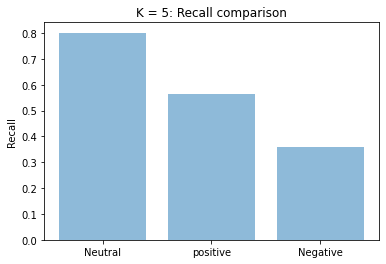

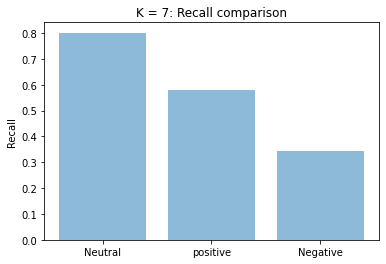

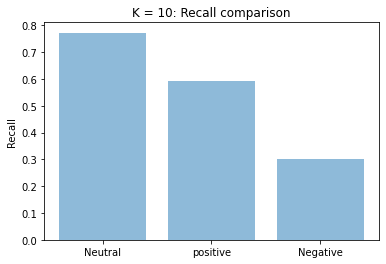

In [24]:
labels = ('Neutral', 'positive', 'Negative')
y_pos = np.arange(len(labels))
for i in range(len(K)):
  plt.bar(y_pos, recalls[i], align='center', alpha=0.5)
  plt.xticks(y_pos, labels)
  plt.ylabel('Recall')
  plt.title('K = %d: Recall comparison' % K[i])

  plt.show()

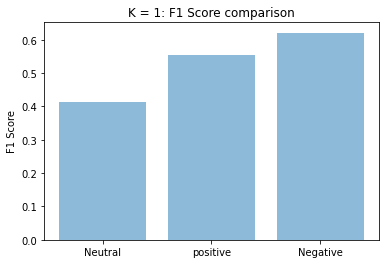

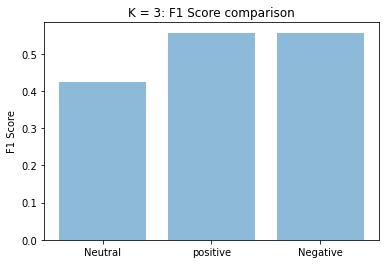

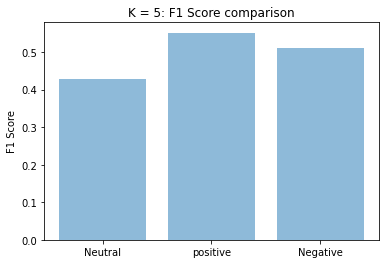

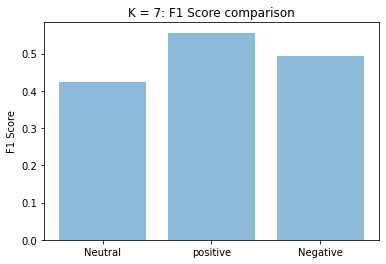

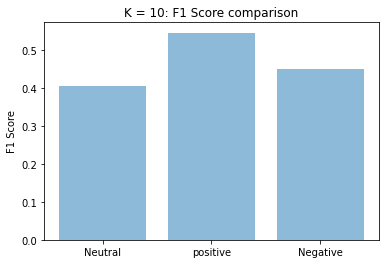

In [25]:
labels = ('Neutral', 'positive', 'Negative')
y_pos = np.arange(len(labels))
for i in range(len(K)):
  plt.bar(y_pos, f1scores[i], align='center', alpha=0.5)
  plt.xticks(y_pos, labels)
  plt.ylabel('F1 Score')
  plt.title('K = %d: F1 Score comparison' % K[i])

  plt.show()